## Classification with RF

In [131]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns

np.random.seed(10)  # set random seed

## Load the data

In [132]:
# Load the dataset
iris = load_iris()
df=pd.DataFrame(iris.data, columns = iris.feature_names)

In [133]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [134]:
# Load the target variable
df['species'] =  pd.Categorical.from_codes(iris.target,iris.target_names)

In [135]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
# Shuffle the data set
df = shuffle(df)

In [137]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
87,6.3,2.3,4.4,1.3,versicolor
111,6.4,2.7,5.3,1.9,virginica
10,5.4,3.7,1.5,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
49,5.0,3.3,1.4,0.2,setosa


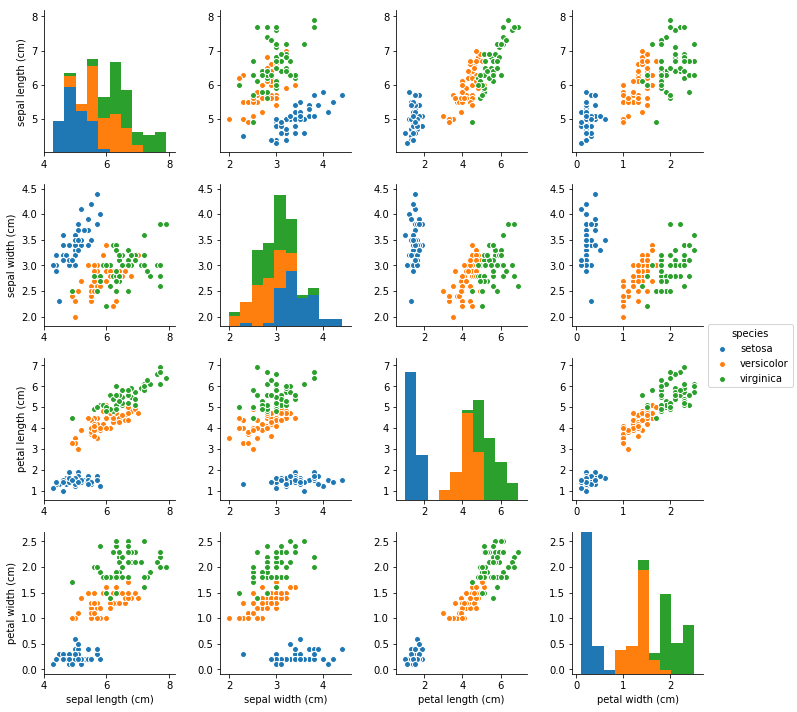

In [138]:
# Check feature distribution of each class, to get an overview of feature and class relationshhip, also useful in validating data
sns.pairplot(df, hue='species')

## Create training and test data 

In [139]:
train, test = train_test_split(df,train_size=0.75, test_size=0.25)

In [140]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 112
Number of observations in the test data: 38


## Preprocess data 

In [141]:
# Check the features
features = df.columns[:4]

In [142]:
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [143]:
# Factorize the target variable - species
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.

In [144]:
y = pd.factorize(train['species'])[0]

In [145]:
len(y)

112

## Train the RF Classifier

In [146]:
# Create a random forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10,  # number of trees
                       criterion='gini',  # or 'entropy' for information gain
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features='auto',  # number of features for best split
                       max_leaf_nodes=None,  # max nodes
                       n_jobs=1,  # CPUs to use
                       random_state = 10,  # random seed
                       class_weight="balanced")  # adjusts weights inverse of freq, also "balanced_subsample" or None

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
model = rf_classifier.fit(train[features], y)

## Apply classifier to test data 

In [147]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
rf_classifier.predict(test[features])

array([2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2])

In [148]:
# View the predicted probabilities of the first 10 observations
rf_classifier.predict_proba(test[features])[0:10]

array([[ 0. ,  0. ,  1. ],
       [ 0. ,  0.9,  0.1],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.9,  0.1],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ]])

## Evaluate classifier

In [149]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[rf_classifier.predict(test[features])]

In [150]:
# View the PREDICTED species for the first five observations
preds[0:5]

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'virginica'], 
      dtype='<U10')

In [151]:
# View the ACTUAL species for the first five observations
test['species'].head()

84     versicolor
149     virginica
78     versicolor
114     virginica
63     versicolor
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [152]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,14,0,0
versicolor,0,1,9
virginica,0,13,1


## View feature importance

In [160]:
# View a list of the features and their importance scores
list(zip(train[features], rf_classifier.feature_importances_))

[('sepal length (cm)', 0.018032602372962881),
 ('sepal width (cm)', 0.018434223979858631),
 ('petal length (cm)', 0.32548252596450389),
 ('petal width (cm)', 0.63805064768267461)]

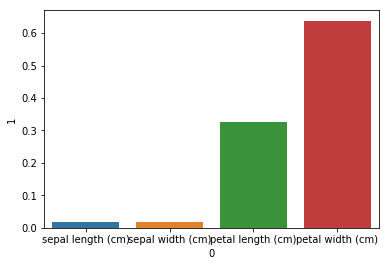

In [162]:
sns.barplot(x=pd.DataFrame(p)[0], y=pd.DataFrame(p)[1], data = pd.DataFrame(p))

## Visualize the random forest

We can visualize and compare decision paths of decision trees and random forests:

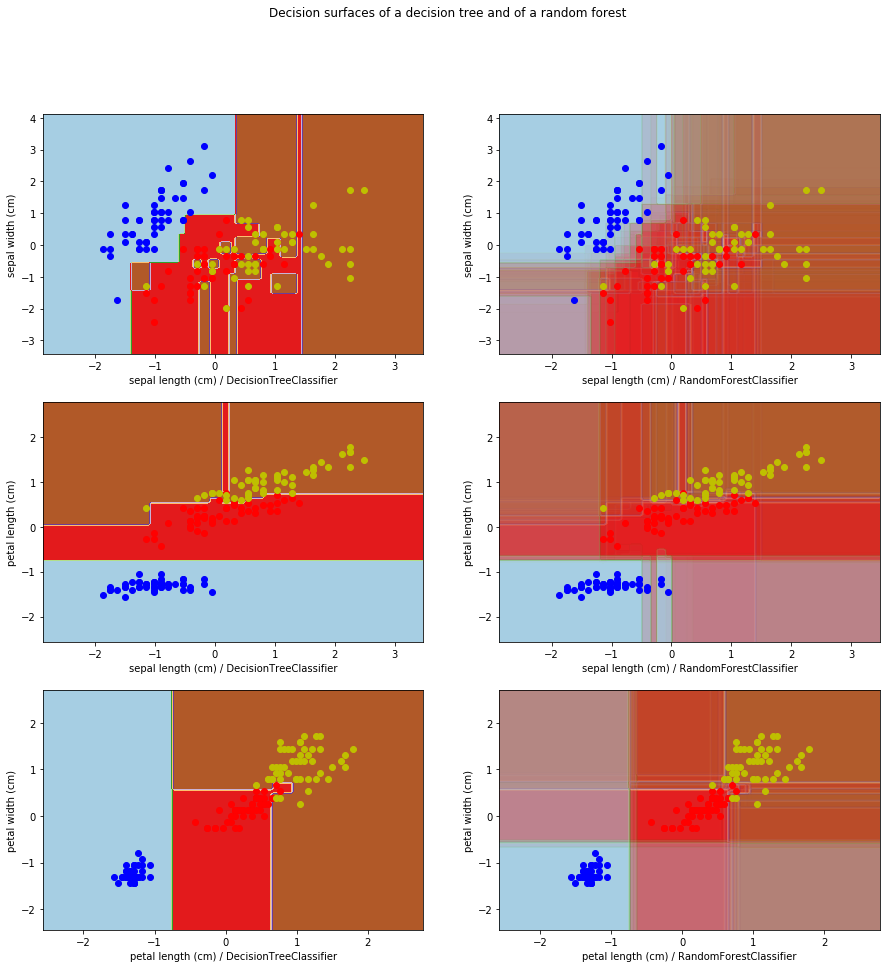

In [164]:

import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
plt.subplots(figsize=(15,15))

# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "bry"
plot_step = 0.05
pl.set_cmap(pl.cm.Paired)

# Load data
iris = load_iris()

plot_idx = 1

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in (DecisionTreeClassifier(),
                  RandomForestClassifier(n_estimators=n_estimators)):
         # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        # Plot the decision boundary
        pl.subplot(3, 2, plot_idx)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = pl.contourf(xx, yy, Z)
        else:
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = pl.contourf(xx, yy, Z, alpha=0.1)

        pl.xlabel("%s / %s" % (iris.feature_names[pair[0]],
                               model.__class__.__name__))
        pl.ylabel(iris.feature_names[pair[1]])
        pl.axis("tight")
        

        # Plot the training points
        for i, c in zip(xrange(n_classes), plot_colors):
            idx = np.where(y == i)
            pl.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i])

        pl.axis("tight")

        plot_idx += 1

pl.suptitle("Decision surfaces of a decision tree and of a random forest")


pl.show()


## Credits

RF -  https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/

Visualization - http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/ensemble/plot_forest_iris.html